In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive

In [2]:
N_size=501
Gamma=0.5
Lambda=0.5

In [3]:
def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return -Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))

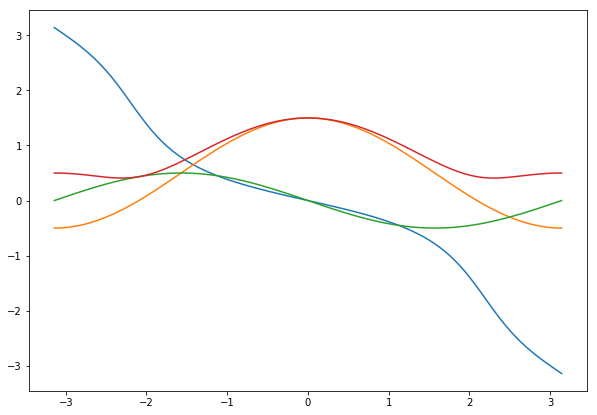

In [4]:
plt.figure(figsize=(10,7))
x=np.linspace(-np.pi,np.pi,100)
plt.plot(x,Phi(Gamma,Lambda,x))
plt.plot(x,Alpha(Gamma,Lambda,x))
plt.plot(x,Beta(Gamma,Lambda,x))
plt.plot(x,Omega(Gamma,Lambda,x))

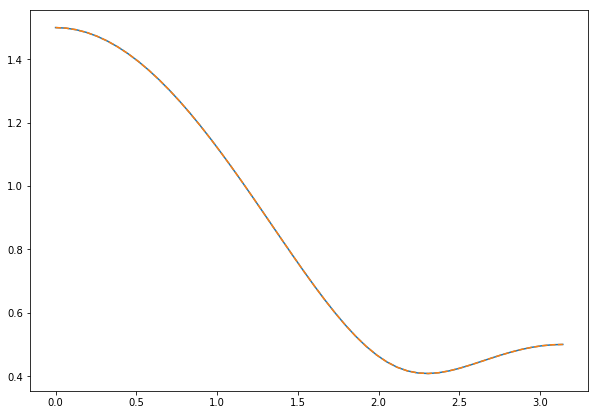

In [5]:
#Can i just sample half of the values?
plt.figure(figsize=(10,7))
x=np.linspace(0,np.pi/N_size*(N_size),50)
plt.plot(x,Omega(Gamma,Lambda,x))
x=np.linspace(0,np.pi,50)
plt.plot(x,Omega(Gamma,Lambda,x),"--")
plt.show()

In [6]:
def Fermi_dirac(beta,mu,n,Gamma=Gamma,Lambda=Lambda,N=N_size):
    # T is the thermic energy associated in the system (beta*T)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    #f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    f=np.exp(beta*(Omega(Gamma,Lambda,(2.*np.pi/float(N_size)) * n)-mu)) +1
    return 1/f
def plot_interactive(beta,mu):
    plt.figure(figsize=(10,7))
    if N_size%2 !=0:
        n=np.linspace(-np.pi/N_size*(N_size-1),np.pi/N_size*(N_size-1),100)
    else:
        n=np.linspace(0,np.pi,100)
    plt.plot(n,Fermi_dirac(beta,mu,n))
    plt.ylim(0,1.05)
    plt.show()

In [7]:
interactive_plot = interactive(plot_interactive, beta=(0, 1,0.001), mu=(-10, 10, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='beta', max=1.0, step=0.001), FloatSlider(value=0.0, …

In [18]:
np.arange(0,(N_size)/2)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [43]:
x=np.arange(0,(N_size-1)/2+ 1)
T=0.001
mu=2
m_cos=[-0.5 if np.random.random()>Fermi_dirac(T,mu,i) else 0.5 for i in x]
m_sin=[-0.5 if np.random.random()>Fermi_dirac(T,mu,i) else 0.5 for i in x]

In [44]:
m_cos=np.array(m_cos[1:][::-1]+m_cos)
m_sin=np.array(m_sin[1:][::-1]+m_sin)

In [45]:
M_plus=(m_cos+m_sin)*0.5
M_minous=(m_cos-m_sin)*0.5

In [51]:
x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
Mplusband=M_plus*np.array([np.exp(1.j*np.sign(np.pi*2/N_size * i)
                                  *Phi(Gamma,Lambda,
                                       np.abs(np.pi*2/N_size * i)))
                           for i in x])


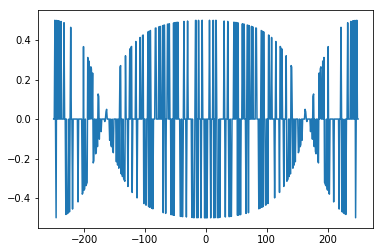

In [53]:
plt.plot(x,Mplusband)

In [31]:
array_phi

array([ 4.99990169e-01-0.00313536j,  4.99911499e-01-0.00940708j,
       -0.00000000e+00+0.j        ,  4.99517467e-01-0.02196134j,
       -0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
        4.98328544e-01-0.04084926j, -0.00000000e+00+0.j        ,
       -0.00000000e+00+0.j        , -4.96404868e-01+0.05985155j,
       -0.00000000e+00+0.j        ,  4.94699899e-01-0.07260861j,
       -0.00000000e+00+0.j        ,  4.92643502e-01-0.08545396j,
       -0.00000000e+00+0.j        , -4.90221472e-01+0.09840177j,
       -4.88868225e-01+0.10491834j, -4.87417109e-01+0.11146552j,
       -0.00000000e+00+0.j        ,  4.84211137e-01-0.12465783j,
        4.82450796e-01-0.13130586j, -4.80581609e-01+0.13799028j,
       -0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
       -0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
       -0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
       -0.00000000e+00+0.j        ,  4.61291259e-01-0.19289991j,
       -0.00000000e+00+0.

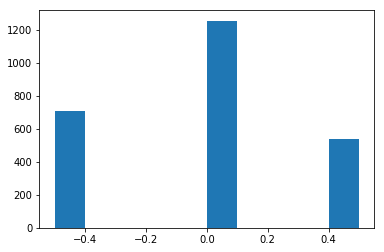

In [10]:
plt.hist(M_plus)
plt.show()

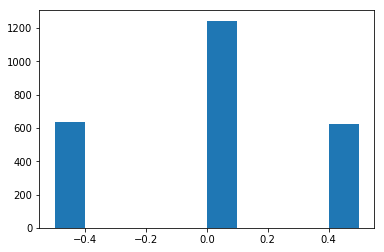

In [11]:
plt.hist(M_minous)
plt.show()

In [13]:
M_minous.mean(),M_plus.mean()

(-0.002, -0.034)